In [1]:
from scipy.stats import bernoulli
from collections import Counter
from itertools import product
from matplotlib import pyplot as plt

In [2]:
def fermats_method(**player_wins):
    game_results = {'winner':[], 'games_played': []}
    if not player_wins:
        player_wins = {'A': 8, 'B': 5}

    max_games = 20 - sum(player_wins.values()) - 1

    for future in list(product(*[(True, False)]*max_games)):
        wins = Counter(player_wins)
        games_played_into_future = 0

        for result in future:
            games_played_into_future += 1
            wins['A' if result else 'B'] += 1
            if max(wins.values()) == 10:
                break

        winner = wins.most_common(1)[0][0]
        game_results['winner'].append(winner)
        game_results['games_played'].append(games_played_into_future)

    print("Scenario results: ", Counter(game_results['winner']))
    print(*[f"player {k} takes {100* (v / 2**max_games):0.1f}% of the pot" 
            for k, v in Counter(game_results['winner']).items()], 
            sep='\n')

    ax = plt.hist(game_results['games_played'], bins=7, range=(0.5, 7.5))
    ax = plt.title("Number of games needed to finish a simulation")

In [5]:
def monte_carlo(simulations = 10000, **player_wins):

    game_results = {'winner':[], 'games_played': []}
    bernoulli_trial = iter(bernoulli(.5).rvs(7*simulations))
    if not player_wins:
        player_wins = {'A': 8, 'B': 5}

    for i in range(simulations):

        wins = Counter(player_wins)
        games_played_into_future = 0

        while max(wins.values()) < 10:
            result = next(bernoulli_trial)
            games_played_into_future += 1
            wins['A' if result == 1 else 'B'] += 1

        winner = wins.most_common(1)[0][0]
        game_results['winner'].append(winner)
        game_results['games_played'].append(games_played_into_future)

    print(f"{simulations} simulations completed!")
    print("Simulation results: ", Counter(game_results['winner']))
    print(*[f"player {k} takes {100* (v / simulations):0.1f}% of the pot" 
            for k, v in Counter(game_results['winner']).items()], 
            sep='\n')

    ax = plt.hist(game_results['games_played'], bins=7, range=(0.5, 7.5))
    ax = plt.title("Number of games needed to finish a simulation")

Scenario results:  Counter({'A': 15, 'B': 1})
player A takes 93.8% of the pot
player B takes 6.2% of the pot


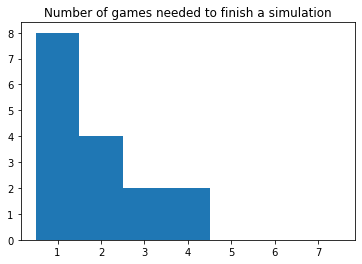

In [3]:
fermats_method(A=9, B=6)

10000 simulations completed!
Simulation results:  Counter({'A': 9370, 'B': 630})
player A takes 93.7% of the pot
player B takes 6.3% of the pot


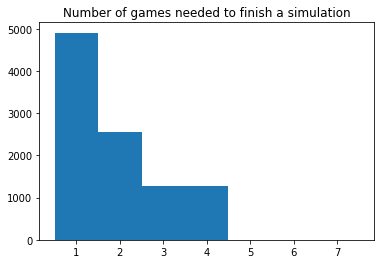

In [6]:
monte_carlo(A=9, B=6)